In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import torch

CUDA_VISIBLE_DEVICES = "0"
os.environ["CUDA_VISIBLE_DEVICES"] = CUDA_VISIBLE_DEVICES

gender_info = {
    "P1": 0, "P3": 0, "P4": 0, "P7": 0, "P8": 0, "P10": 0, "P13": 0, "P15": 0,
    "P2": 1, "P5": 1, "P6": 1, "P9": 1, "P11": 1, "P12": 1, "P14": 1, "P16": 1,
    "P17": 1, "P18": 1, "P19": 1, "P20": 1
}


# Loading A small Demo dataset with RGB, Depth, RPC, RT and GT Mesh modalities...

In [2]:
from dataset.dataset_mmMesh2_vis import RF3DPoseDataset, ToTensor
import torchvision.transforms as transforms

dataset_vis = RF3DPoseDataset([], transform=ToTensor(), load_save=True, use_image=True, is_demo=True, cache_dir="../cached_data_test_vis/")

Dataset loaded Successfully from ../cached_data_test_vis/rf3dpose_all ...
Kept 5000 / 5000 samples after filtering.


Generating 5000 frames starting from index 0 for combined GIF with 4 columns...
tensor([  2,   1, 100]) image: torch.Size([3, 480, 640]), depth: torch.Size([1, 480, 640]), radar_tensor: torch.Size([121, 111, 31]), radar_points: torch.Size([1000, 4])
tensor([  2,   1, 101]) image: torch.Size([3, 480, 640]), depth: torch.Size([1, 480, 640]), radar_tensor: torch.Size([121, 111, 31]), radar_points: torch.Size([1000, 4])
tensor([  2,   1, 102]) image: torch.Size([3, 480, 640]), depth: torch.Size([1, 480, 640]), radar_tensor: torch.Size([121, 111, 31]), radar_points: torch.Size([1000, 4])
tensor([  2,   1, 103]) image: torch.Size([3, 480, 640]), depth: torch.Size([1, 480, 640]), radar_tensor: torch.Size([121, 111, 31]), radar_points: torch.Size([1000, 4])
tensor([  2,   1, 104]) image: torch.Size([3, 480, 640]), depth: torch.Size([1, 480, 640]), radar_tensor: torch.Size([121, 111, 31]), radar_points: torch.Size([1000, 4])
tensor([  2,   1, 105]) image: torch.Size([3, 480, 640]), depth: torch

KeyboardInterrupt: 

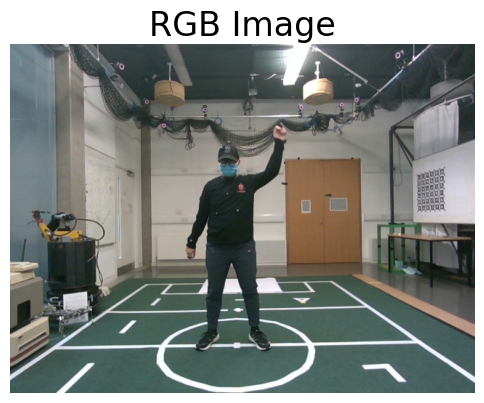

In [3]:
from dataset.data_loader_Plotting_projection import plot_frames_for_gif_depth
for i in range(50):
    plot_frames_for_gif_depth(dataset_vis, combined_gif_path=f'vis_depth/combined_output_depth_{i+1}.gif', act_id=i+1, is_plot="save")

# Loading Full dataset with only radar-based RPC, RT and GT Mesh modalities...

In [4]:
from dataset.dataset_mmMesh2 import RF3DPoseDataset, ToTensor
import torchvision.transforms as transforms

dataset_train = RF3DPoseDataset([], 
                                # Train-Test Specifics
                                split = "train",  
                                main_modality="rt", 
                                protocol_id="p1", 
                                split_id="s1", 
                                temporal_window=6,
                                # meta info
                                load_save=True, 
                                cache_dir="../mmDataset/MR-Mesh/",  
                                transform=transforms.Compose([ToTensor()]), 
                                )
dataset_test = RF3DPoseDataset([], 
                               # Train-Test Specifics
                               split = "test",  
                               main_modality="rt", 
                               protocol_id="p1", 
                               split_id="s1", 
                               temporal_window=6,
                               # meta info
                               load_save=True, 
                               cache_dir="../mmDataset/MR-Mesh/",  
                               transform=transforms.Compose([ToTensor()]), 
                               )

Dataset loaded Successfully from ../mmDataset/MR-Mesh/rf3dpose_all ...
Load indices from pre-saved ../mmDataset/MR-Mesh/rf3dpose_all/indeces.pkl.gz indices splits.
Loaded train Dataset with length 495512.
Unique sub in train: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Unique act in train: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Kept 495506 / 495512 samples after filtering.
Dataset loaded Successfully from ../mmDataset/MR-Mesh/rf3dpose_all ...
Load indices from pre-saved ../mmDataset/MR-Mesh/rf3dpose_all/indeces.pkl.gz indices splits.
Loaded test Dataset with length 131809.
Unique sub in test: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Unique act in test: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,